In [1]:
# import chess
import chess.svg
import time 
import log
import minimax
from treelib import Node, Tree
from IPython.display import SVG, display,HTML,clear_output
import os
import time

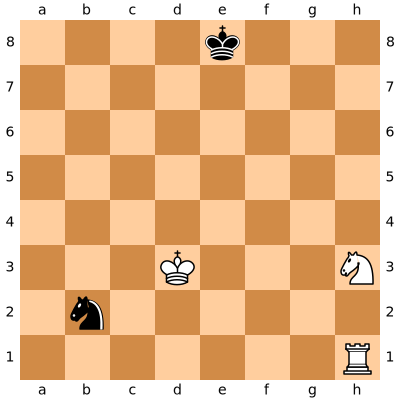

False
WAITING for player to make move....
****************************************
************** GAME OVER ***************
* Player Y has won!      *
* Reason: Player X is in check            *
****************************************



In [2]:
board = chess.Board() 
# default 
playerType = 'X'
player = ''
secondsPassed = 0
white = True
timeExpired = False
currentPiecePositions = {'n':chess.C8,'k':chess.E8,'K':chess.E1,'R':chess.H1,'N':chess.G1}
def GameOver(winner,comments):
    declareWinner = ""
    if (winner == 'X' or winner == 'Y'):
        declareWinner = "Player "+str(winner)+" has won!"
    else:
        declareWinner = " TIED "
    txt = "****************************************\n"\
          "************** GAME OVER ***************\n"\
          "* "+str(declareWinner)+"      *\n"\
          "* Reason: "+str(comments)+"            *\n"\
          "****************************************\n"
    print(txt)
def isGameOver(board,playerType):
    if (board.is_check() or board.is_stalemate()):
        if (board.is_check()):
            if(playerType == 'X'):
                GameOver("X","Player Y is in check")
            else:
                GameOver("Y","Player X is in check")
        else:
            GameOver("T","Stalemate")
        return True
    
    return False
def setupBoard(board):
    board.clear_board()
    board.set_piece_at(chess.E1,chess.Piece(chess.KING,True))
    board.set_piece_at(chess.H1,chess.Piece(chess.ROOK,True))
    board.set_piece_at(chess.G1,chess.Piece(chess.KNIGHT,True) )
    board.set_piece_at(chess.E8,chess.Piece(chess.KING, False))
    board.set_piece_at(chess.C8,chess.Piece(chess.KNIGHT,False))
def getSquareIndexByString(str):
    index = 0
    for val in chess.SQUARE_NAMES:
        if val == str:
            return index
        index = index+1
    return -1
def displayBoard(board):
    clear_output()
    boardImage = chess.svg.board(board)
    display(SVG(boardImage))
def getMovesByLineString(line):
    splitLine = line.split(':')
    moves = {'move': splitLine[2].strip()}
    # get the index value for the square
    moves['squareIndex'] = getSquareIndexByString(moves['move'])
    if(playerType == 'X'):
        moves['piece'] = splitLine[1].lower()
    else:
        moves['piece'] = splitLine[1]
    moves['pieceObject'] = chess.Piece.from_symbol(moves['piece'])
    return moves
def play(turn):
    tree = minimax.miniMaxTree(board,playerType)
    brd = tree.get_node(tree.root).data
    #for node in tree.children('currentBoard'):
    #    brd = node.data
    move = brd.peek()
    board.push(move)
    newSquare = str(move.uci()[2:4].strip())
    piece = str(board.piece_at(getSquareIndexByString(newSquare)))
    print(piece)
    displayBoard(board)
    # Let's say move was KING 
#     piece = chess.Piece(chess.KNIGHT,False).symbol()
    if (playerType == 'X'):
        piece = piece.capitalize()
    else:
        piece = piece.lower()
        
#     movePiece = chess.Move(currentPiecePositions[piece],chess.H3)
#     move = "h3"
#     if (movePiece in board.pseudo_legal_moves):
#         board.push(movePiece)
#         currentPiecePositions[piece] = getSquareIndexByString(move)
    displayBoard(board)
    print(timeExpired)
    player.write(turn,str(piece).capitalize(),newSquare,timeExpired)

playerType = input("Player? (x or y)")
playerType = playerType.capitalize()
if (playerType == 'X'):
    player = log.FileHandler('X')
else:
    player = log.FileHandler('Y')
setupBoard(board)
# turns
turn = 1

gameover = False

if (playerType == 'X'):
    play(turn)
    turn = turn+1
while(turn < 100 and not gameover):
    # check if game is over
    timeExpired = False
    print("WAITING for player to make move....")
    startTime = time.time()
    endTime = startTime
    secondsPassed = 0
    gameover = isGameOver(board,playerType)
    while(True and not gameover and secondsPassed <=10):
        endTime = time.time()
        secondsPassed = endTime-startTime
        wait = player.waitOpponent()
        if wait:
            
            pass
        else:
            break 
    if (secondsPassed > 10):
            timeExpired = True
    if (not gameover):
        # Now it's other player's turn
        m = player.getPreviousMove()
        playerMoves = getMovesByLineString(m)
        if(not timeExpired):
            movePiece = chess.Move(currentPiecePositions[playerMoves['piece']],playerMoves['squareIndex'])
            board.push(movePiece)
            currentPiecePositions[playerMoves['piece']] = getSquareIndexByString(playerMoves['move'])
            gameover = isGameOver(board,playerType)
        else:
            board.turn = not board.turn
        turn=turn+1
        play(turn)
        turn = turn+1
